In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
tickets_headers = ['PUR_DATE', 'TRV_DATE', 'TKT_NUM', 'CPN_NUM', 'CABIN', 'AIRLINE', 'ORG', 'DST', \
    'FLT_NO', 'DEP_TIME', 'ARR_TIME', 'ARR_DATE', 'CPN_FARE']
tickets = pd.read_csv('ticket.txt', sep='\s+', lineterminator='\n', header=None, names=tickets_headers)
tickets['DEP_DATETIME'] = tickets['DEP_DATE'].astype(str) + ' ' + tickets['DEP_TIME'].astype(str)
tickets['ARR_DATETIME'] = tickets['ARR_DATE'].astype(str) + ' ' + tickets['ARR_TIME'].astype(str)
tickets['DEP_DATETIME'] = pd.to_datetime(tickets['DEP_DATETIME'], format='%Y%m%d %H%M')
tickets['ARR_DATETIME'] = pd.to_datetime(tickets['ARR_DATETIME'], format='%Y%m%d %H%M')
tickets.drop_duplicates()
tickets.head()
len(tickets)
# tickets.info()

368

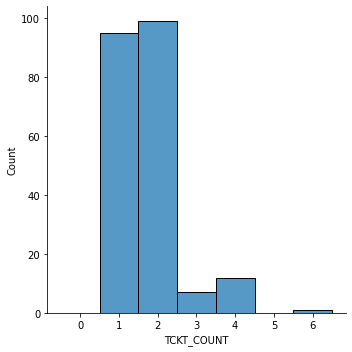

In [4]:
tickets['TCKT_COUNT'] = tickets['TCKT_NO']
result = tickets.groupby('TCKT_NO', as_index = False)['TCKT_COUNT'].count()
bins = np.arange(0, result['TCKT_COUNT'].max() + 1.5) - 0.5
sns.displot(result, x='TCKT_COUNT', bins=bins,)

In [ ]:
tmp = {str(k): f.to_numpy().tolist() for k, f in tickets.groupby('TCKT_NO')}
tmp

In [ ]:
# tickets.groupby('TCKT_NO', as_index=False)['ORG', 'DST'].count()
tmp = {str(k): f.to_numpy().tolist() for k, f in tickets.groupby('TCKT_NO')}
one_way_cnt, return_cnt = 0, 0
for ticket_no, legs in tmp.items():
    if legs[0][6] == legs[-1][7]:
        return_cnt +=1
    else:
        one_way_cnt += 1
print(f'Return: {return_cnt}')
print(f'One-Way: {one_way_cnt}')
print(f'Total Tickets: {len(tmp)}')
    

In [48]:
# schedule = pd.read_csv('farzad-schedule.csv', header=0, parse_dates=schedule_dates)
schedule = pd.read_csv('farzad-schedule.csv', header=0)
schedule.drop_duplicates()
# schedule['DEP_DATETIME'] = schedule['DEPT_DATE'].astype(str) + ' ' + schedule['LOCAL_DEP_TIME'].astype(str)
# schedule['DEP_DATETIME'] = pd.to_datetime(schedule['DEP_DATETIME'], format= '%Y-%m-%d %H%M')
schedule.head()
# schedule.info()
schedule['DEPT_DATE'] = pd.to_datetime(schedule['DEPT_DATE'])
# schedule.info()
schedule.head()


,CARRIER,SHARED_AL,OP_INDICATOR,CODESHARE1,CODESHARE2,ORG,VIA,DST,SUM_GCD_MILE,FLIGHT_NO,STOPS,SEATS,DEPT_DATE,LOCAL_DEP_TIME
0,DL,NaN,O,NaN,NaN,DEN,NaN,DTW,1119,1410,0,160,2016-02-08,1628
1,DL,NaN,O,AF 2078,AZ 3264,JFK,NaN,PHX,2147,439,0,160,2016-02-08,1830
2,KL,DL,N,DL 1505,NaN,MSP,NaN,SFO,1585,7298,0,160,2016-02-08,1746
3,DL,OO,O,VS 3361,NaN,FSD,NaN,MSP,195,4556,0,50,2016-02-08,1710
4,CA,UA,N,UA 396,NaN,HNL,NaN,SFO,2394,7232,0,344,2016-02-08,2155


In [61]:
subset = schedule[:1000]
subset['OD'] = subset['ORG'] + '-' + subset['DST'] 
# result = schedule.groupby('OD', as_index = False)['SEATS'].sum()
tmp = {str(k2): {str(k1): f1.to_numpy().tolist() for k1, f1 in f2.groupby('CARRIER')} for k2, f2 in subset.groupby('OD')}
tmp['SEA-DFW']
od = 'SEA-DFW'
carrier = 'AA'
# input('Enter O-D' od)
# input('Carrier Name', carrier)
for key1, value1 in tmp.items():
    total_od_seats = 0
    for key2, value2 in value1.items():
        total_od_carrier_seats = 0
        for item in value2:
            total_od_carrier_seats += item['SEATS']
        total_od_seats += total_od_carrier_seats
    print('Share of ')



{'AA': [['AA',
   'AS',
   'N',
   'AS  662',
   nan,
   'SEA',
   nan,
   'DFW',
   1657,
   7114,
   0,
   181,
   Timestamp('2016-02-08 00:00:00'),
   1305,
   'SEA-DFW'],
  ['AA',
   nan,
   'O',
   nan,
   nan,
   'SEA',
   'PHX',
   'DFW',
   1970,
   649,
   1,
   187,
   Timestamp('2016-02-12 00:00:00'),
   510,
   'SEA-DFW']],
 'AS': [['AS',
   'AA',
   'N',
   'AA 1228',
   nan,
   'SEA',
   nan,
   'DFW',
   1657,
   1535,
   0,
   181,
   Timestamp('2016-02-08 00:00:00'),
   500,
   'SEA-DFW']],
 'BA': [['BA',
   'AA',
   'N',
   'AA  143',
   nan,
   'SEA',
   nan,
   'DFW',
   1657,
   2395,
   0,
   160,
   Timestamp('2016-02-08 00:00:00'),
   832,
   'SEA-DFW'],
  ['BA',
   'AA',
   'N',
   'AA 1402',
   nan,
   'SEA',
   nan,
   'DFW',
   1657,
   2402,
   0,
   160,
   Timestamp('2016-02-08 00:00:00'),
   1154,
   'SEA-DFW']],
 'GF': [['GF',
   'AA',
   'N',
   'AA 1402',
   nan,
   'SEA',
   nan,
   'DFW',
   1657,
   6529,
   0,
   160,
   Timestamp('2016-02-11 00:0

In [ ]:
schedule_subset = schedule[schedule['SEATS'] > 100]
schedule_subset

<AxesSubplot:xlabel='SUM_GCD_MILE', ylabel='SEATS'>

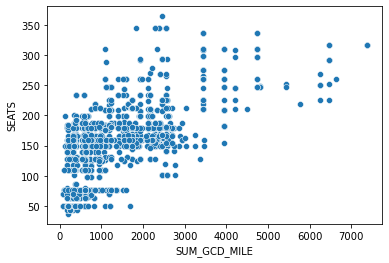

In [7]:
schedule_tmp = schedule.sample(n=4000, random_state=1)
# schedule_tmp.head()
# schedule_tmp.info()
sns.scatterplot(data=schedule_tmp, x='SUM_GCD_MILE', y='SEATS')

<AxesSubplot:>

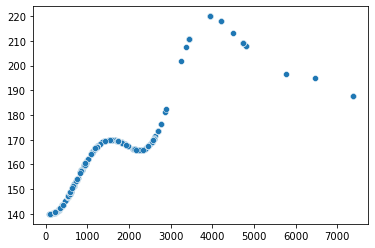

In [40]:
X = schedule_tmp['SUM_GCD_MILE'].values.reshape(-1, 1)
y = schedule_tmp['SEATS'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
# cv_scores = cross_val_score(regr, X_train,y_train, cv=5)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
sns.scatterplot(x=X_test.reshape(-1), y=y_pred)


In [45]:
def r2(y_true, y_predicted):
    sse = sum((y_true - y_predicted)**2)
    tse = (len(y_true) - 1) * np.var(y_true, ddof=1)
    r2_score = 1 - (sse / tse)
    return r2_score

In [46]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


R-squared: 0.2401483053971576
